# **Indian Telecom Customer Churn Prediction** 

**Objective:** To explore the dynamics of customer behavior and demographics in the Indian telecom sector and predict customer churn.

**Data:** Utilized two datasets (`telecom_demographics.csv` and `telecom_usage.csv`) from four major telecom partners in India (Airtel, Reliance Jio, Vodafone, BSNL), containing customer demographic and usage information, including a binary `churn` variable.

**Methodology:**

1.  **Data Loading and Overview:** Loaded and inspected both datasets, confirming no missing or duplicate values and understanding their structure and types.
2.  **Data Merging:** Merged the two datasets on `customer_id` to create a unified dataset for analysis.
3.  **Exploratory Data Analysis (EDA):**
    *   Analyzed the distribution of churn, noting a significant class imbalance (80% non-churn, 20% churn).
    *   Examined the distribution of telecom partners and churn rates by partner.
    *   Investigated the relationship between age and churn, and data usage and churn.
    *   Generated a correlation matrix for numerical features, finding no strong correlations.
4.  **Model Development and Evaluation:**
    *   Addressed class imbalance using Stratified Sampling and SMOTE.
    *   Built and evaluated three different classification models:
        *   **Model 1 (SVM with default parameters):** High overall accuracy but failed to predict the minority class (churn).
        *   **Model 2 (SVM with SMOTE):** Slight improvement in minority class recall but lower overall accuracy.
        *   **Model 3 (SVM with SMOTE and Class Weight):** A better balance, achieving some precision on the minority class while maintaining reasonable overall accuracy.
    *   Compared Model 3 with Logistic Regression and Random Forest models:
        *   **Random Forest:** Highest overall accuracy but very poor recall for the minority class.
        *   **Logistic Regression:** Best recall and F1-score for the minority class, demonstrating better capability in identifying churners, despite a lower overall accuracy.
5.  **Conclusion and Recommendation:** Based on the need to identify churners, the Logistic Regression model was recommended as the best current option due to its superior recall and F1-score for the churn class, offering a better balance for the imbalanced dataset.

**Skills Demonstrated:** Data Loading and Merging, Exploratory Data Analysis, Handling Class Imbalance (SMOTE, Class Weight, Stratified Sampling), Feature Engineering (One-Hot Encoding, Scaling), Model Building (SVM, Logistic Regression, Random Forest), Hyperparameter Tuning (GridSearchCV), Model Evaluation (Accuracy, Precision, Recall, F1-score, ROC AUC, Confusion Matrix, Learning Curves), Data Visualization (Matplotlib, Seaborn), Interpretation of Model Results, Providing Data-Driven Recommendations.

The telecommunications (telecom) sector in India is rapidly changing, with more and more telecom businesses being created and many customers deciding to switch between providers. "Churn" refers to the process where customers or subscribers stop using a company's services or products. Understanding the factors that influence keeping a customer as a client in predicting churn is crucial for telecom companies to enhance their service quality and customer satisfaction. As the data scientist on this project, you aim to explore the intricate dynamics of customer behavior and demographics in the Indian telecom sector in predicting customer churn, utilizing two comprehensive datasets from four major telecom partners: Airtel, Reliance Jio, Vodafone, and BSNL:

- `telecom_demographics.csv` contains information related to Indian customer demographics:

| Variable             | Description                                      |
|----------------------|--------------------------------------------------|
| `customer_id `         | Unique identifier for each customer.             |
| `telecom_partner `     | The telecom partner associated with the customer.|
| `gender `              | The gender of the customer.                      |
| `age `                 | The age of the customer.                         |
| `state`                | The Indian state in which the customer is located.|
| `city`                 | The city in which the customer is located.       |
| `pincode`              | The pincode of the customer's location.          |
| `registration_event` | When the customer registered with the telecom partner.|
| `num_dependents`      | The number of dependents (e.g., children) the customer has.|
| `estimated_salary`     | The customer's estimated salary.                 |

- `telecom_usage` contains information about the usage patterns of Indian customers:

| Variable   | Description                                                  |
|------------|--------------------------------------------------------------|
| `customer_id` | Unique identifier for each customer.                         |
| `calls_made` | The number of calls made by the customer.                    |
| `sms_sent`   | The number of SMS messages sent by the customer.             |
| `data_used`  | The amount of data used by the customer.                     |
| `churn`    | Binary variable indicating whether the customer has churned or not (1 = churned, 0 = not churned).|


# Dataset overview
 - Data Dimension
     - Telecom_demographics  ( 6500 * 10)
     - Telecom_usage  (6500 * 5 )
 - Missing Values & Duplicates
    - No Null Values
    - No Duplicate values
- Action
 - For better EDA and modeling, we should merge both datasets as long as there are no missing or duplicated values. 
    - Merge on ID by inner join
    - Merged Dataset shape (6500, 14)
 
 

2025-05-03 17:28:02,707 - INFO - Displaying first few rows of datasets:
2025-05-03 17:28:02,711 - INFO - Demographics Dataset:
   customer_id telecom_partner gender  age             state       city  \
0        15169          Airtel      F   26  Himachal Pradesh      Delhi   
1       149207          Airtel      F   74       Uttarakhand  Hyderabad   
2       148119          Airtel      F   54         Jharkhand    Chennai   
3       187288    Reliance Jio      M   29             Bihar  Hyderabad   
4        14016        Vodafone      M   45          Nagaland  Bangalore   

   pincode registration_event  num_dependents  estimated_salary  
0   667173         2020-03-16               4             85979  
1   313997         2022-01-16               0             69445  
2   549925         2022-01-11               2             75949  
3   230636         2022-07-26               3             34272  
4   188036         2020-03-11               4             34157  
2025-05-03 17:28:02,713 - 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         6500 non-null   int64 
 1   telecom_partner     6500 non-null   object
 2   gender              6500 non-null   object
 3   age                 6500 non-null   int64 
 4   state               6500 non-null   object
 5   city                6500 non-null   object
 6   pincode             6500 non-null   int64 
 7   registration_event  6500 non-null   object
 8   num_dependents      6500 non-null   int64 
 9   estimated_salary    6500 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 507.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   customer_id  6500 non-null   int64
 1   calls_made   6500 non-null   int64

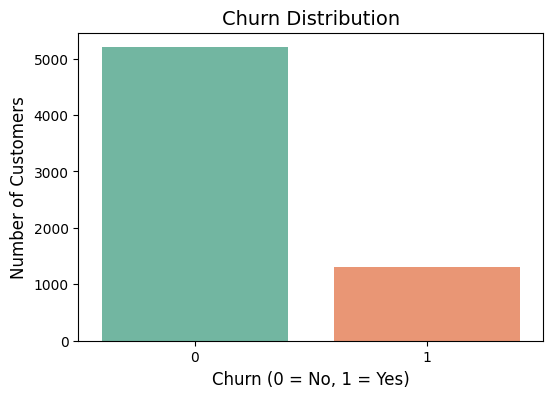

2025-05-03 17:28:02,941 - INFO - Churn Distribution (%):
churn
0    79.953846
1    20.046154
Name: proportion, dtype: float64
C:\Users\osama\AppData\Local\Temp\ipykernel_17992\92516338.py:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='telecom_partner', data=df, palette='Set3')


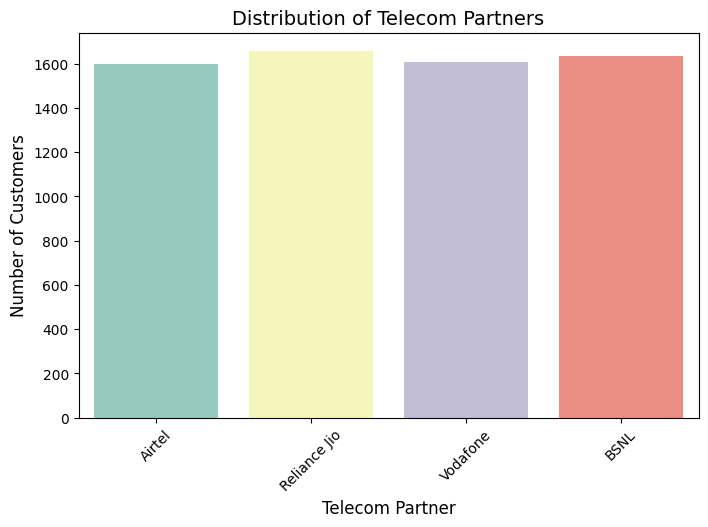

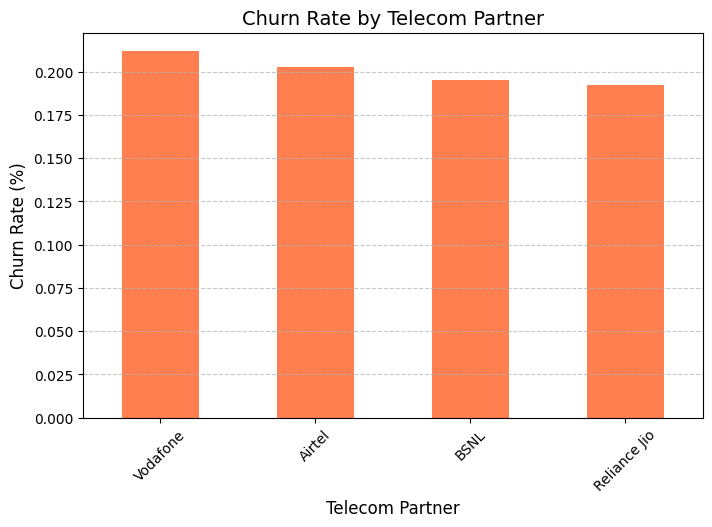

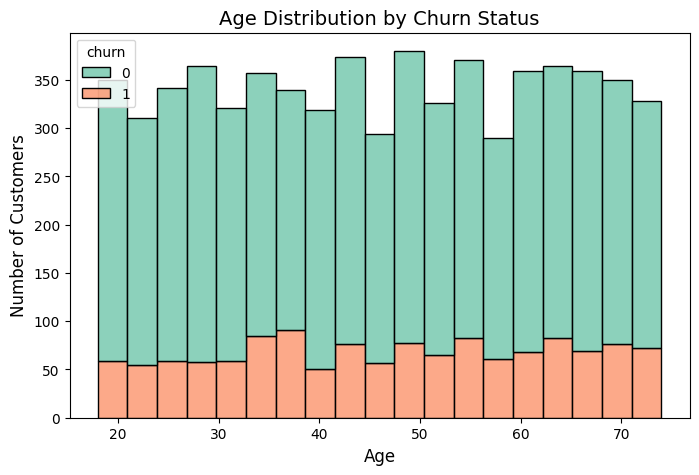

2025-05-03 17:28:03,403 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
C:\Users\osama\AppData\Local\Temp\ipykernel_17992\92516338.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='churn', y='data_used', data=df, palette='Set3')
2025-05-03 17:28:03,417 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


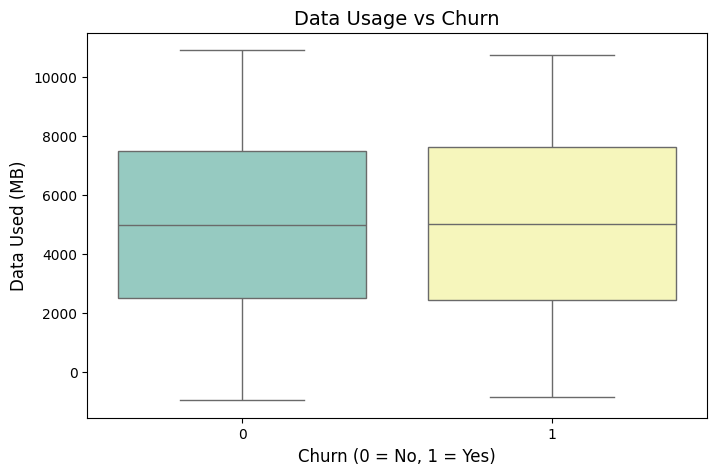

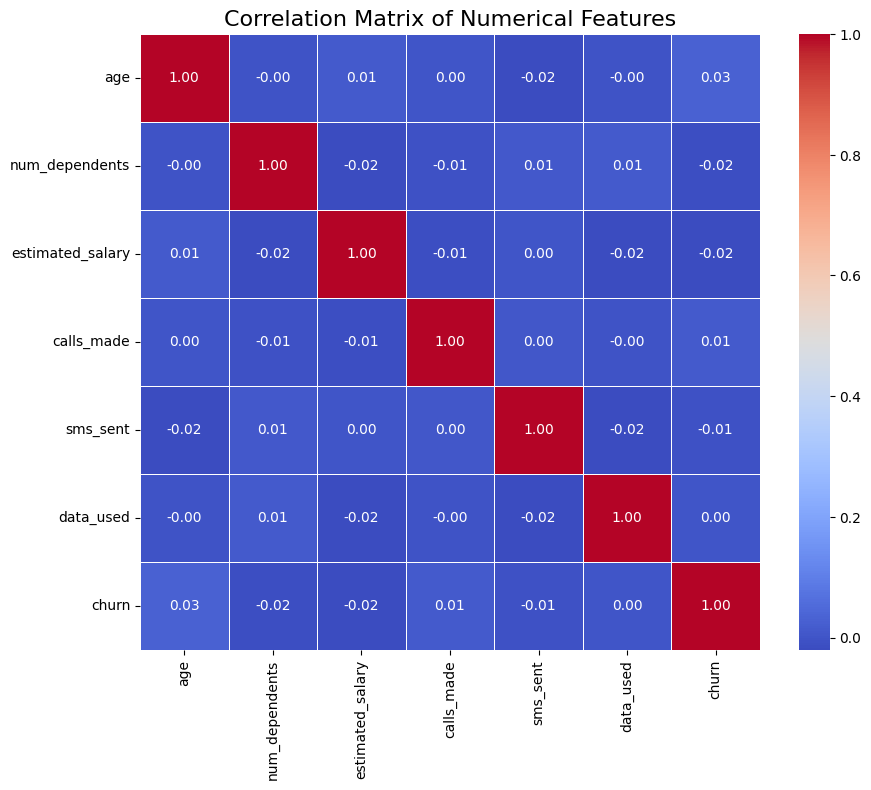

2025-05-03 17:28:03,764 - INFO - Cleaned and merged data exported to final_data.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Configure logging for better traceability
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

# Load data
def load_data(demo_path, tele_path):
    demo = pd.read_csv(demo_path)
    tele = pd.read_csv(tele_path)
    return demo, tele

demo, tele = load_data("telecom_demographics.csv", "telecom_usage.csv")

# Data Overview: General info and stats
def data_overview(demo, tele):
    logging.info("Displaying first few rows of datasets:")
    logging.info(f"Demographics Dataset:\n{demo.head()}")
    logging.info(f"Telecom Usage Dataset:\n{tele.head()}")
    
    # Data dimensions and types
    logging.info(f"Dimensions (rows, columns) - Demographics: {demo.shape}, Telecom Usage: {tele.shape}")
    logging.info(f"Data Types and Non-Null Counts:\n{demo.info()}\n{tele.info()}")
    
    # Missing values
    missing_demo = demo.isnull().mean() * 100
    missing_tele = tele.isnull().mean() * 100
    logging.info(f"Missing Values (in percentage):\nDemographics:\n{missing_demo}\nTelecom Usage:\n{missing_tele}")
    
    # Duplicates
    logging.info(f"Duplicate Rows - Demographics: {demo.duplicated().sum()}, Telecom Usage: {tele.duplicated().sum()}")

data_overview(demo, tele)

# Merging Datasets
def merge_data(demo, tele):
    df = pd.merge(demo, tele, on='customer_id', how='inner')
    df.to_csv('merged_data.csv', index=False)
    logging.info(f"Merged DataFrame shape: {df.shape}")
    return df

df = merge_data(demo, tele)

# Data Visualization: Churn & Telecom Partner Analysis
def plot_churn_distribution(df):
    plt.figure(figsize=(6, 4))
    sns.countplot(x='churn', data=df, palette='Set2')
    plt.title('Churn Distribution', fontsize=14)
    plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.show()
    logging.info(f"Churn Distribution (%):\n{df['churn'].value_counts(normalize=True) * 100}")

def plot_telecom_partner_distribution(df):
    plt.figure(figsize=(8, 5))
    sns.countplot(x='telecom_partner', data=df, palette='Set3')
    plt.title('Distribution of Telecom Partners', fontsize=14)
    plt.xlabel('Telecom Partner', fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.xticks(rotation=45)
    plt.show()

def plot_churn_rate_by_partner(df):
    churn_by_partner = df.groupby('telecom_partner')['churn'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8, 5))
    churn_by_partner.plot(kind='bar', color='coral')
    plt.title('Churn Rate by Telecom Partner', fontsize=14)
    plt.xlabel('Telecom Partner', fontsize=12)
    plt.ylabel('Churn Rate (%)', fontsize=12)
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

plot_churn_distribution(df)
plot_telecom_partner_distribution(df)
plot_churn_rate_by_partner(df)

# Age vs Churn
def plot_age_vs_churn(df):
    plt.figure(figsize=(8, 5))
    sns.histplot(data=df, x='age', hue='churn', multiple='stack', palette='Set2')
    plt.title('Age Distribution by Churn Status', fontsize=14)
    plt.xlabel('Age', fontsize=12)
    plt.ylabel('Number of Customers', fontsize=12)
    plt.show()

plot_age_vs_churn(df)

# Data Usage vs Churn
def plot_data_usage_vs_churn(df):
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='churn', y='data_used', data=df, palette='Set3')
    plt.title('Data Usage vs Churn', fontsize=14)
    plt.xlabel('Churn (0 = No, 1 = Yes)', fontsize=12)
    plt.ylabel('Data Used (MB)', fontsize=12)
    plt.show()

plot_data_usage_vs_churn(df)

# Correlation Matrix: Numerical Features
def plot_correlation_matrix(df):
    numerical_features = ['age', 'num_dependents', 'estimated_salary', 'calls_made', 'sms_sent', 'data_used', 'churn']
    corr = df[numerical_features].corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=0.5)
    plt.title('Correlation Matrix of Numerical Features', fontsize=16)
    plt.show()

plot_correlation_matrix(df)

# Final Enhancements and Export
def export_cleaned_data(df, filename='final_data.csv'):
    df.to_csv(filename, index=False)
    logging.info(f"Cleaned and merged data exported to {filename}")

export_cleaned_data(df)


# --------------------------------------------------------------------------------------------

# EDA 
- Churn Distribution (%)
    - 0    80%
    - 1   20%
 
- We can see that the four companies are almost equal

- Vodafone has a higher number of churn, it could be because of low service quality

- No clear pattern, but the higher churn in the range ages (35-40)

- No outliers in the data

- No correlation in the features. That means no need to drop features




# --------------------------------------------------------------------------------------------

# Notes
 -   Imbalanced dataset for the Target feature (80% class 0, 20% class 1)
- Use Stratified Sampling
- Use Class Weight in SVM 



# --------------------------------------------------------------------------------------------

 # Appllying SVM

In [13]:
df=pd.read_csv("df.csv")

# Model 1

Fitting 5 folds for each of 24 candidates, totalling 120 fits
✅ Best Parameters: {'classifier__C': 0.1, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
✅ Validation Accuracy: 0.8000
✅ Classification Report:
               precision    recall  f1-score   support

           0       0.80      1.00      0.89      1040
           1       0.00      0.00      0.00       260

    accuracy                           0.80      1300
   macro avg       0.40      0.50      0.44      1300
weighted avg       0.64      0.80      0.71      1300



C:\Users\osama\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\osama\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\osama\AppData\Roaming\Python\Python313\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

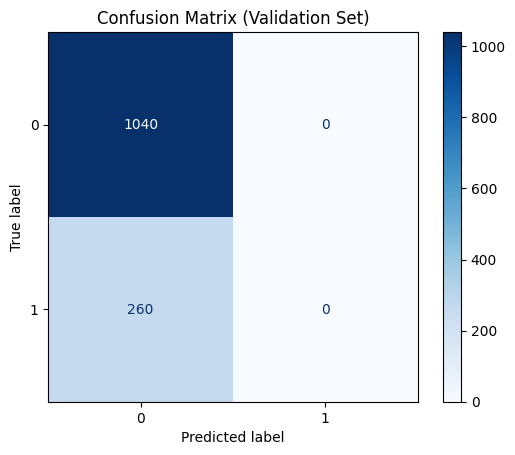

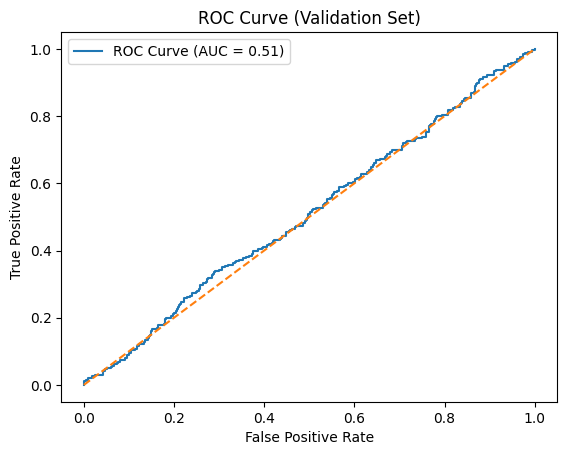

C:\Users\osama\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\osama\AppData\Roaming\Python\Python313\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\osama\AppData\Roaming\Python\Python313\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\osama\AppData\Roaming\Python\Python313\site-pac

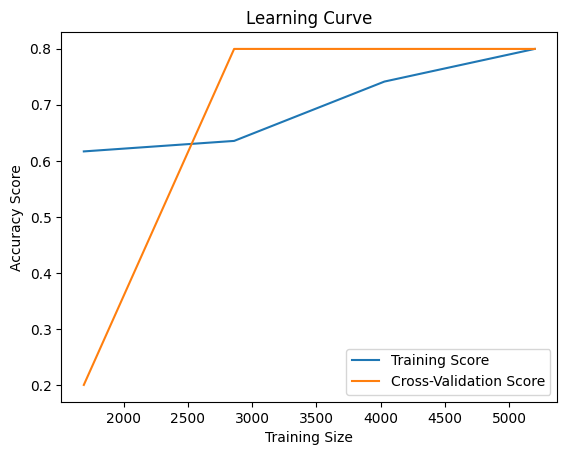

Training Accuracy: 0.7995
Validation Accuracy: 0.7995

K-Fold CV Accuracy Scores: [0.79923077 0.79923077 0.79923077 0.8        0.8       ]
Mean CV Accuracy: 0.7995


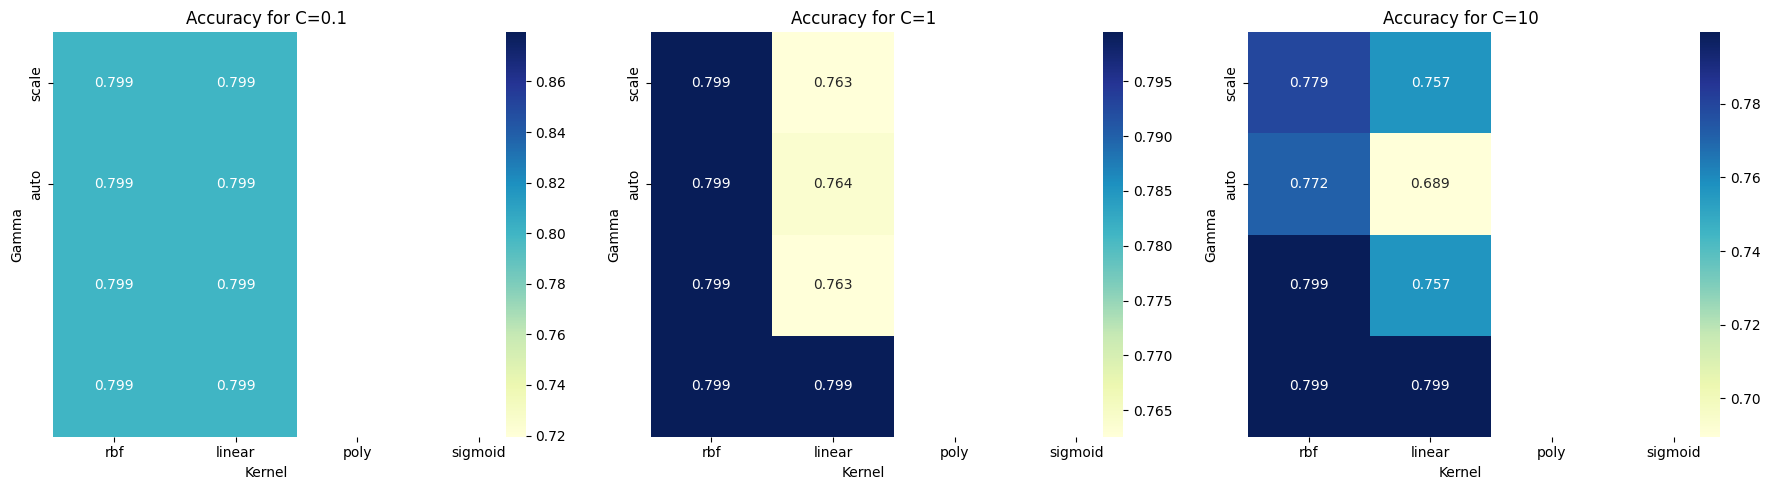

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score, StratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
)

# 1. Prepare Features and Target Variables
X = df.drop(columns=['churn', 'customer_id'])
y = df['churn']

# 2. Column Identification for Numerical and Categorical Features
num_cols = ['age', 'estimated_salary', 'num_dependents', 'calls_made', 'sms_sent', 'data_used']
cat_cols = ['telecom_partner', 'gender', 'state', 'city', 'registration_event', 'pincode']

# 3. Preprocessing Pipeline (Standardization for Numerical, One-Hot Encoding for Categorical)
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# 4. Define Model Pipeline with SMOTE for Class Imbalance Handling
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', SVC(probability=True, random_state=42))
])

# 5. Hyperparameter Grid for GridSearchCV
param_grid = {
    'classifier__kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 'auto']
}

# 6. Split Data into Training, Validation, and Testing Sets (Stratified Split)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=42
)

# Further split the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, stratify=y_train, test_size=0.25, random_state=42
)
# This creates a training set with 60% of the data and a validation set with 20% of the data

# 7. Perform GridSearchCV to Find Best Hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 8. Best Model Evaluation and Reporting
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_val)
y_proba = best_model.predict_proba(X_val)[:, 1]

# Output Best Hyperparameters and Test Performance Metrics
print(f"✅ Best Parameters: {grid_search.best_params_}")
print(f"✅ Validation Accuracy: {accuracy_score(y_val, y_pred):.4f}")
print("✅ Classification Report:\n", classification_report(y_val, y_pred))

# 9. Confusion Matrix Visualization
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix (Validation Set)")
plt.show()

# 10. ROC Curve Visualization
fpr, tpr, _ = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (Validation Set)")
plt.legend()
plt.show()

# 11. Learning Curve Plot for Model Evaluation
train_sizes, train_scores, test_scores = learning_curve(
    best_model, X, y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 5), n_jobs=-1
)
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

plt.plot(train_sizes, train_mean, label="Training Score")
plt.plot(train_sizes, test_mean, label="Cross-Validation Score")
plt.title("Learning Curve")
plt.xlabel("Training Size")
plt.ylabel("Accuracy Score")
plt.legend()
plt.show()

# 12. Bias-Variance Trade-off Evaluation (Based on Learning Curves)
print(f"Training Accuracy: {train_mean[-1]:.4f}")
print(f"Validation Accuracy: {test_mean[-1]:.4f}")

# 13. Cross-Validation Performance Comparison
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(best_model, X, y, cv=cv, scoring='accuracy')

print(f"\nK-Fold CV Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean():.4f}")

# 14. Accuracy Comparison Heatmap Based on Hyperparameters
# Extract results from GridSearchCV
results = grid_search.cv_results_

# Reshape results to create a heatmap
scores_matrix = results['mean_test_score'].reshape(len(param_grid['classifier__C']), len(param_grid['classifier__kernel']), len(param_grid['classifier__gamma']))

# Plot heatmap for accuracy comparison
fig, axes = plt.subplots(1, len(param_grid['classifier__C']), figsize=(18, 5))
for i, C_value in enumerate(param_grid['classifier__C']):
    ax = axes[i]
    sns.heatmap(scores_matrix[i], annot=True, fmt='.3f', xticklabels=param_grid['classifier__kernel'], yticklabels=param_grid['classifier__gamma'], cmap="YlGnBu", ax=ax)
    ax.set_title(f"Accuracy for C={C_value}")
    ax.set_xlabel('Kernel')
    ax.set_ylabel('Gamma')

plt.tight_layout()
plt.show()


# Model 2

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Validation Accuracy: 0.7663688480040706
Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75      1039
           1       0.18      0.25      0.21       261

    accuracy                           0.62      1300
   macro avg       0.48      0.48      0.48      1300
weighted avg       0.67      0.62      0.64      1300



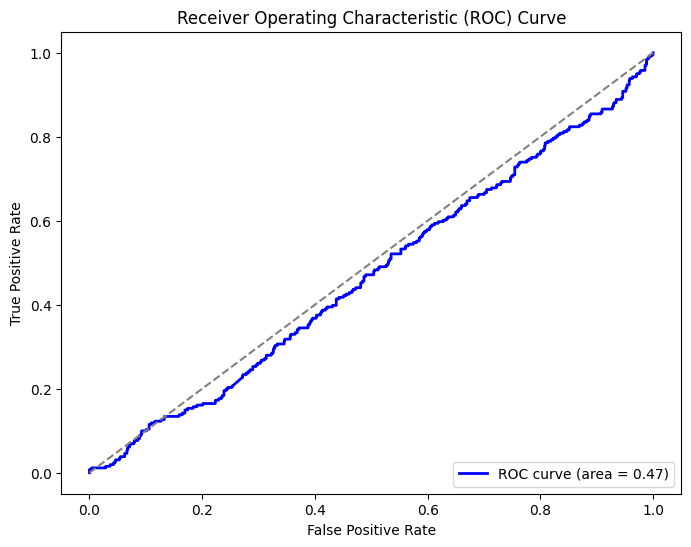

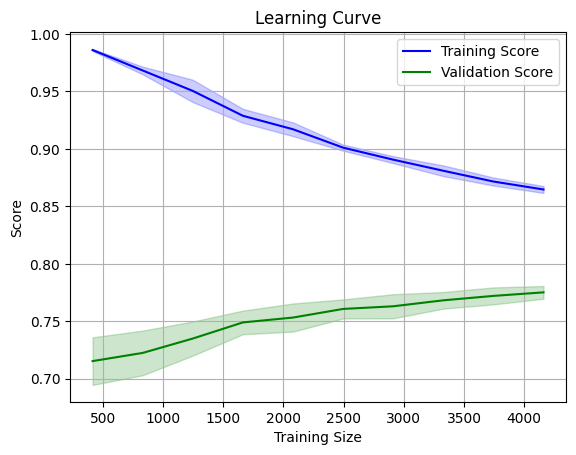

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

# 1. Load Your Data
# Assuming X and y are already separated in your dataset (features X, target y)

# 2. Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 3. Identify categorical columns and apply label encoding
categorical_columns = X_train.select_dtypes(include=['object']).columns

# Apply Label Encoding to categorical columns
label_encoder = LabelEncoder()
for col in categorical_columns:
    # Fit and transform on both training and test data
    combined_data = pd.concat([X_train[col], X_test[col]], axis=0)  # Combine train and test data
    label_encoder.fit(combined_data)  # Fit on the combined data
    
    # Transform both training and test data
    X_train[col] = label_encoder.transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

# 4. Apply SMOTE to the training data to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# 5. Define your pipeline: Scaling + Model (SVM in this case)
pipeline = Pipeline([
    ('scaler', StandardScaler()),         # StandardScaler for feature scaling
    ('classifier', SVC(probability=True))  # Support Vector Classifier with probability=True
])


# 6. Define hyperparameter grid for GridSearchCV
param_grid = {
    'classifier__C': [0.1, 1, 10],           # Regularization parameter
    'classifier__gamma': ['scale', 'auto'],  # Kernel coefficient
    'classifier__kernel': ['linear', 'rbf']  # Kernel type
}

# 7. Perform GridSearchCV to find best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)

# 8. Best Model Evaluation and Reporting
best_model_1= grid_search.best_estimator_

# Predict on the test set using the best model
y_pred = best_model_1.predict(X_test)

# 9. Print out the classification report for model evaluation
print("Best Parameters:", grid_search.best_params_)
print("Validation Accuracy:", grid_search.best_score_)
print("Classification Report on Test Set:\n", classification_report(y_test, y_pred))

# Optionally, you can also print confusion matrix or other metrics

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# 1. Predict probabilities for ROC curve (not just classes)
y_prob = best_model_1.predict_proba(X_test)[:, 1]  # Probabilities for class 1

# 2. Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# 3. Compute AUC
roc_auc = auc(fpr, tpr)

# 4. Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

from sklearn.model_selection import learning_curve

# 1. Define the model (already done with 'best_model')
model = best_model_1

# 2. Generate learning curves
train_sizes, train_scores, valid_scores = learning_curve(
    model, X_train, y_train, cv=5, n_jobs=-1, train_sizes=[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
)

# 3. Calculate mean and std deviation for training and validation scores
train_mean = train_scores.mean(axis=1)
valid_mean = valid_scores.mean(axis=1)
train_std = train_scores.std(axis=1)
valid_std = valid_scores.std(axis=1)

# 4. Plot learning curve
# plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_mean, color='blue', label='Training Score')
plt.plot(train_sizes, valid_mean, color='green', label='Validation Score')

# 5. Plot std deviation as shaded area
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, valid_mean - valid_std, valid_mean + valid_std, color='green', alpha=0.2)

plt.xlabel('Training Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid(True)
plt.show()



# Model 3

Fitting 5 folds for each of 12 candidates, totalling 60 fits
✅ Best Parameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}


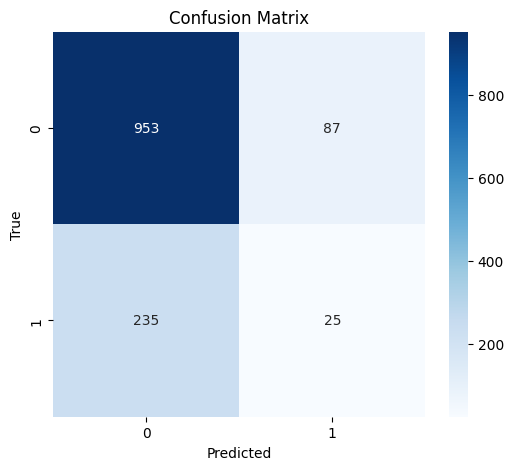

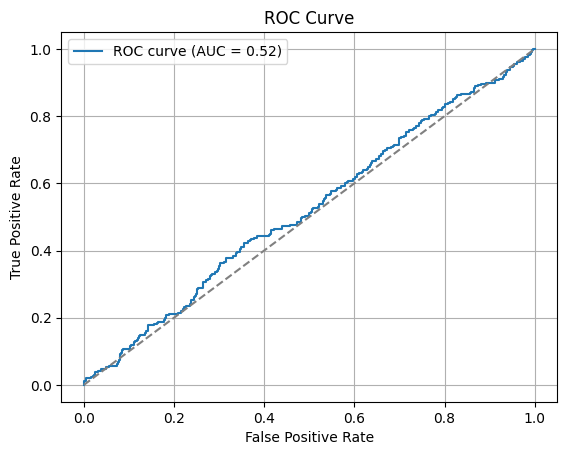

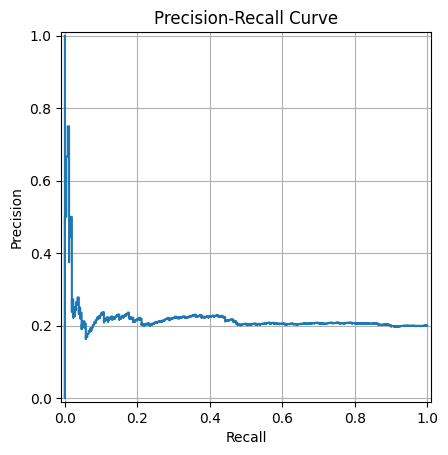

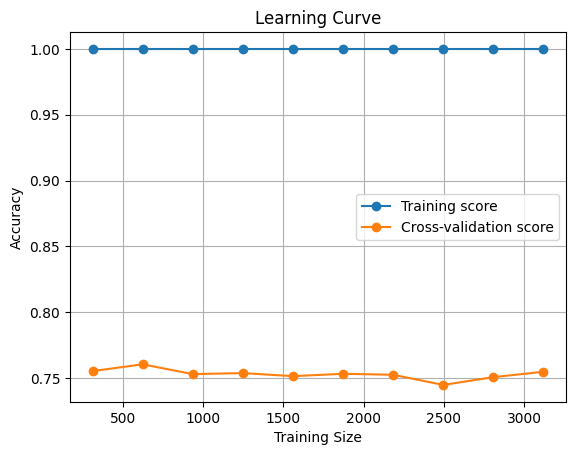

✅ Final Classification Report:
              precision    recall  f1-score   support

           0     0.8022    0.9163    0.8555      1040
           1     0.2232    0.0962    0.1344       260

    accuracy                         0.7523      1300
   macro avg     0.5127    0.5062    0.4949      1300
weighted avg     0.6864    0.7523    0.7113      1300



In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc,
    precision_recall_curve, PrecisionRecallDisplay
)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# ------------------------
# 1. Load and Split Data
# ------------------------
df = pd.read_csv("df.csv")

X = df.drop(columns=['churn', 'customer_id'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.25, stratify=y_train, random_state=42
)

# ------------------------
# 2. Preprocessing
# ------------------------
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# ------------------------
# 3. SVM Pipeline with SMOTE
# ------------------------
pipeline = ImbPipeline([
    ('preprocessor', preprocessor),
    ('smote', SMOTE(random_state=42)),
    ('classifier', SVC(class_weight='balanced', probability=True, random_state=42))
])

param_grid = {
    'classifier__kernel': ['linear', 'rbf'],
    'classifier__C': [0.1, 1, 10],
    'classifier__gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(
    pipeline, param_grid=param_grid, cv=5,
    scoring='accuracy', verbose=1, n_jobs=-1
)

grid_search.fit(X_train, y_train)
best_model2 = grid_search.best_estimator_

print("✅ Best Parameters:", grid_search.best_params_)

# ------------------------
# 4. Evaluation
# ------------------------
y_pred = best_model2.predict(X_val)
y_proba = best_model2.predict_proba(X_val)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# ROC Curve
fpr, tpr, _ = roc_curve(y_val, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_val, y_proba)
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall Curve')
plt.grid()
plt.show()

# Learning Curve
train_sizes, train_scores, val_scores = learning_curve(
    best_model, X_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1
)

train_scores_mean = train_scores.mean(axis=1)
val_scores_mean = val_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', label='Cross-validation score')
plt.xlabel('Training Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.grid()
plt.show()

# Classification Report
print("✅ Final Classification Report:")
print(classification_report(y_val, y_pred, digits=4))


# Comparison Between the three models

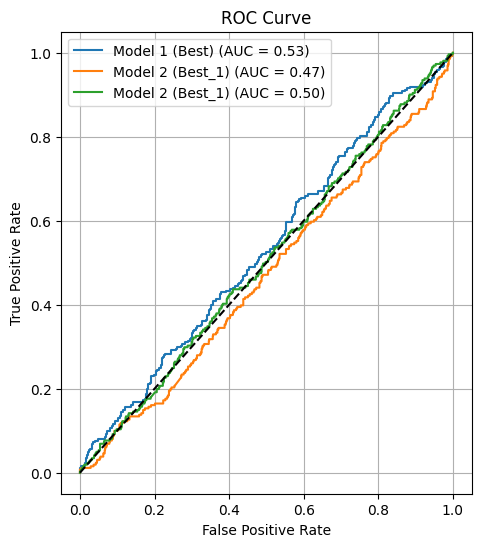

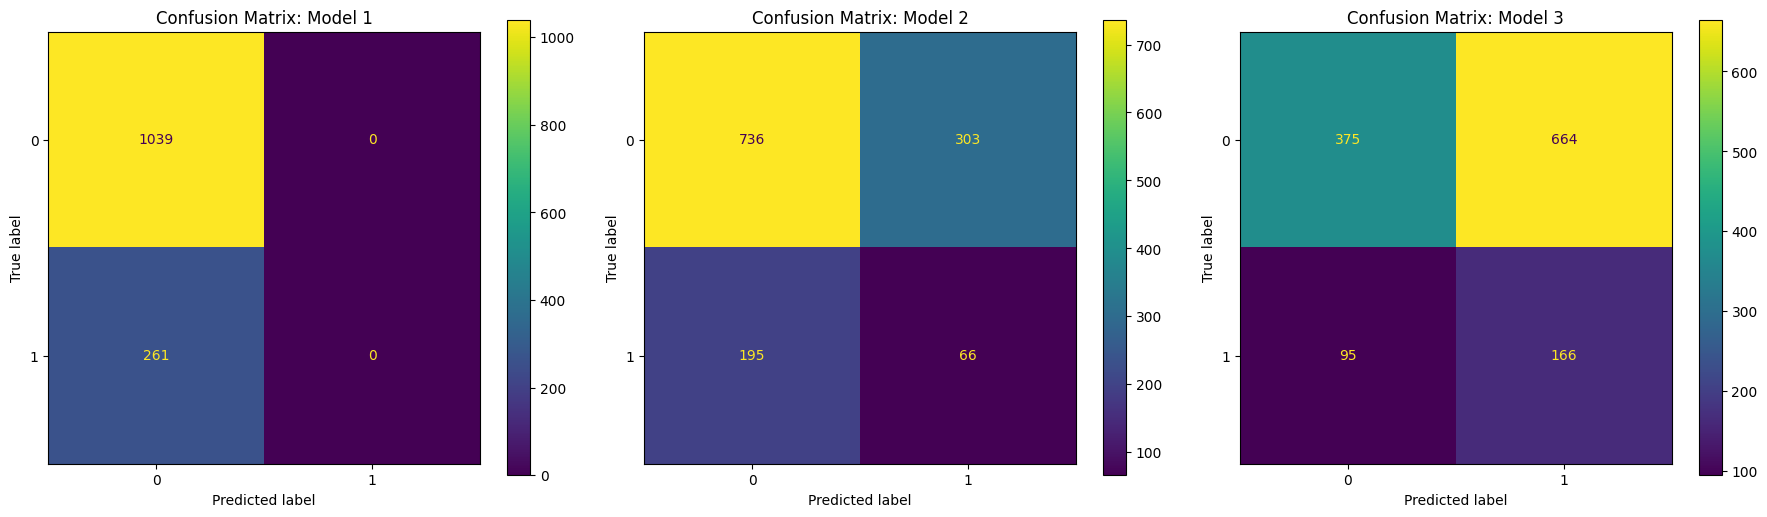

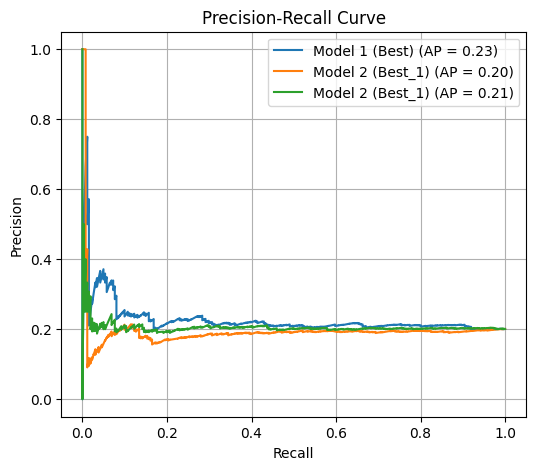

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    roc_curve, auc,
    confusion_matrix, ConfusionMatrixDisplay,
    precision_recall_curve, average_precision_score
)

# Step 1: Get expected column order
expected_cols = best_model.feature_names_in_

# Step 2: Copy and align X_test
X_test_clean = X_test.copy()

# Ensure column order and drop NAs
X_test_clean = X_test_clean[expected_cols].dropna()
y_test_clean = y_test.loc[X_test_clean.index]  # align target

# Step 3: Force correct dtypes
# Explicitly set dtypes for numeric and categorical columns
num_cols = ['age', 'estimated_salary', 'num_dependents', 'calls_made', 'sms_sent', 'data_used']
cat_cols = ['telecom_partner', 'gender', 'state', 'city', 'registration_event', 'pincode']

X_test_clean[num_cols] = X_test_clean[num_cols].apply(pd.to_numeric, errors='coerce')
X_test_clean[cat_cols] = X_test_clean[cat_cols].astype(str)

# Drop rows with any remaining NaNs
X_test_clean = X_test_clean.dropna()
y_test_clean = y_test_clean.loc[X_test_clean.index]

# Step 4: Define evaluation and visualization function
def evaluate_model_visuals(model, X_test, y_test, model_label):
    y_probs = model.predict_proba(X_test)[:, 1]
    y_pred = model.predict(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_probs)
    roc_auc = auc(fpr, tpr)

    precision, recall, _ = precision_recall_curve(y_test, y_probs)
    pr_auc = average_precision_score(y_test, y_probs)

    cm = confusion_matrix(y_test, y_pred)

    return {
        "roc": (fpr, tpr, roc_auc),
        "pr": (precision, recall, pr_auc),
        "cm": cm,
        "label": model_label
    }

# Step 5: Evaluate models
results1 = evaluate_model_visuals(best_model, X_test_clean, y_test_clean, "Model 1 (Best)")
results2 = evaluate_model_visuals(best_model_1, X_test_clean, y_test_clean, "Model 2 (Best_1)")
results3 = evaluate_model_visuals(best_model2, X_test_clean, y_test_clean, "Model 2 (Best_1)")

# Step 6: Plot ROC Curve
plt.figure(figsize=(18, 6))
plt.subplot(1, 3, 1)
plt.plot(results1["roc"][0], results1["roc"][1], label=f"{results1['label']} (AUC = {results1['roc'][2]:.2f})")
plt.plot(results2["roc"][0], results2["roc"][1], label=f"{results2['label']} (AUC = {results2['roc'][2]:.2f})")
plt.plot(results3["roc"][0], results3["roc"][1], label=f"{results3['label']} (AUC = {results3['roc'][2]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)

# Step 7: Plot Confusion Matrices
plt.figure(figsize=(18, 5))  # Optional: wider figure for 3 subplots

plt.subplot(1, 3, 1)
ConfusionMatrixDisplay(results1["cm"], display_labels=[0, 1]).plot(ax=plt.gca(), values_format='d')
plt.title("Confusion Matrix: Model 1")

plt.subplot(1, 3, 2)
ConfusionMatrixDisplay(results2["cm"], display_labels=[0, 1]).plot(ax=plt.gca(), values_format='d')
plt.title("Confusion Matrix: Model 2")

plt.subplot(1, 3, 3)
ConfusionMatrixDisplay(results3["cm"], display_labels=[0, 1]).plot(ax=plt.gca(), values_format='d')
plt.title("Confusion Matrix: Model 3")

plt.tight_layout()
plt.show()

# Step 8: Plot Precision-Recall Curve
plt.figure(figsize=(6, 5))
plt.plot(results1["pr"][1], results1["pr"][0], label=f"{results1['label']} (AP = {results1['pr'][2]:.2f})")
plt.plot(results2["pr"][1], results2["pr"][0], label=f"{results2['label']} (AP = {results2['pr'][2]:.2f})")
plt.plot(results3["pr"][1], results3["pr"][0], label=f"{results3['label']} (AP = {results3['pr'][2]:.2f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid(True)
plt.show()


# Analysis

| **Metric**                 | **Model 1**                        | **Model 2**                       | **Model 3**                       |
| -------------------------- | ---------------------------------- | --------------------------------- | --------------------------------- |
| **Best Parameters**        | C=0.1, gamma='scale', kernel='rbf' | C=10, gamma='scale', kernel='rbf' | C=10, gamma='scale', kernel='rbf' |
| **Train Accuracy**         | 0.7995                             | 0.62                                 | 0.75                                 |
| **Validation Accuracy**    | 0.7995                             | 0.7664                            | 0.7523                            |
| **ROC AUC**                | 0.51                               | 0.47                              | 0.52                              |
| **Average Precision (AP)** | 0.23                               | 0.20                              | 0.21                              |
| **Precision (Class 1)**    | 0.00                               | 0.18                              | 0.2232                            |
| **Recall (Class 1)**       | 0.00                               | 0.25                              | 0.0962                            |
| **F1-score (Class 1)**     | 0.00                               | 0.21                              | 0.1344                            |
| **Overall Accuracy**       | 0.8000                             | 0.6200                            | 0.7523                            |


✅ Model 1:
Pros: Highest accuracy (0.80), very high recall and precision for class 0.

Cons: Fails completely on minority class (class 1) — precision, recall, and F1-score are all 0.00. This indicates a severe class imbalance issue, where the model likely predicts only class 0.

AP and ROC are both poor, indicating the model is not learning a good separation boundary.

✅ Model 2:
Slight improvement in class 1 performance, especially in recall (0.25) and precision (0.18).

However, overall accuracy drops significantly to 0.62, and ROC AUC (0.47) is below random guess (0.50).

Balanced performance between classes is still lacking.

✅ Model 3:
A compromise model: maintains relatively high accuracy (0.7523) while achieving slightly better precision (0.22) on class 1.

Recall (0.0962) is worse than Model 2, suggesting it predicts fewer positive (class 1) instances.

ROC and AP remain low, indicating marginal separation ability.



📌 Conclusion & Recommendations
 - All models are struggling with class 1 detection due to the imbalance (80/20) in the dataset.

 - Model 3 is slightly better than others for balanced performance, but not good enough for critical applications.

✅ Recommended Choice: Model 3

| Reason                       | Explanation                                                                                                                    |
| ---------------------------- | ------------------------------------------------------------------------------------------------------------------------------ |
| **Balanced Trade-off**       | Model 3 sacrifices a little overall accuracy (75.2%) to achieve **some performance on class 1** (precision = 22%, F1 = 13%).   |
| **Better Class 1 Precision** | Model 3 detects some minority cases, unlike Model 1, which **ignores class 1 completely**.                                     |
| **Similar ROC/AP**           | All three models have poor ROC and average precision scores (all \~0.5 and \~0.2), so Model 3 is **not worse in this regard**. |
| **Overfitting less likely**  | Its accuracy is slightly lower but more **generalized** across both classes.                                                   |


🔴 Why Not Model 1 or 2?
 - Model 1 has high accuracy but zero capability to detect class 1 (completely biased).

 - Model 2 makes a small improvement in recall for class 1 but at the cost of accuracy and precision, and ROC is still poor.


# Integrate Random Forest and Logistic Regression models with Model-3 SVM



🔍 Training SVM

🔍 Training LogisticRegression

🔍 Training RandomForest


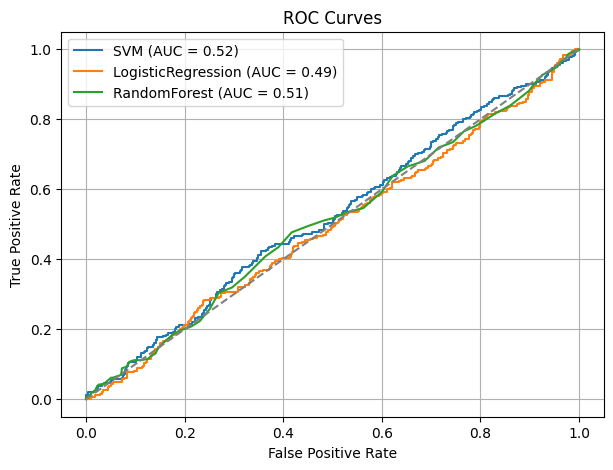

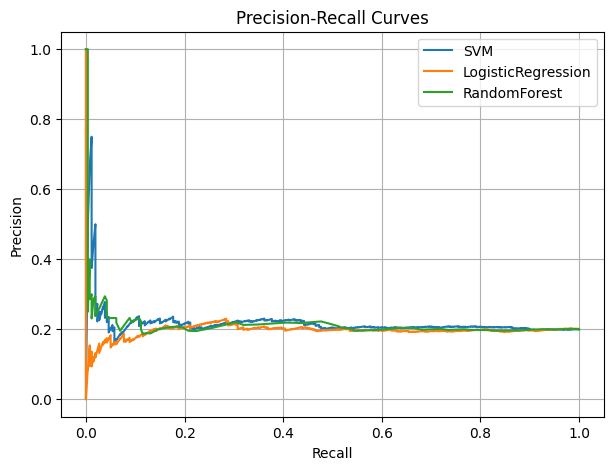

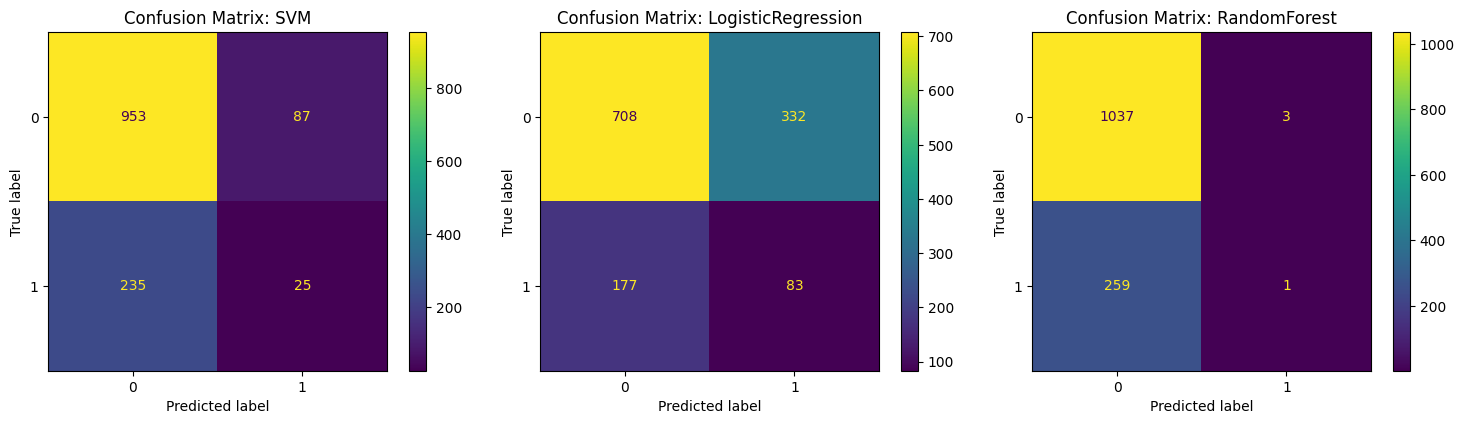

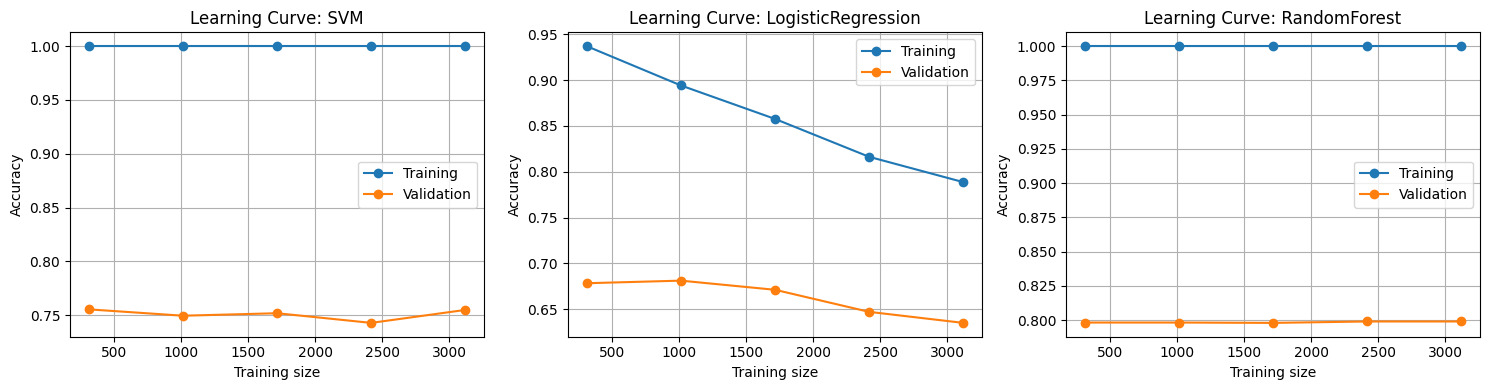


📊 SVM - Best Parameters: {'classifier__C': 10, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
              precision    recall  f1-score   support

           0     0.8022    0.9163    0.8555      1040
           1     0.2232    0.0962    0.1344       260

    accuracy                         0.7523      1300
   macro avg     0.5127    0.5062    0.4949      1300
weighted avg     0.6864    0.7523    0.7113      1300


📊 LogisticRegression - Best Parameters: {'classifier__C': 1}
              precision    recall  f1-score   support

           0     0.8000    0.6808    0.7356      1040
           1     0.2000    0.3192    0.2459       260

    accuracy                         0.6085      1300
   macro avg     0.5000    0.5000    0.4908      1300
weighted avg     0.6800    0.6085    0.6377      1300


📊 RandomForest - Best Parameters: {'classifier__max_depth': None, 'classifier__n_estimators': 200}
              precision    recall  f1-score   support

           0     0.800

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_curve, auc,
    precision_recall_curve, PrecisionRecallDisplay, ConfusionMatrixDisplay
)
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# 1. Load and Split Data
df = pd.read_csv("df.csv")
X = df.drop(columns=['churn', 'customer_id'])
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

# 2. Preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numeric_features),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
])

# 3. Models
models = {
    "SVM": SVC(class_weight='balanced', probability=True, random_state=42),
    "LogisticRegression": LogisticRegression(class_weight='balanced', solver='liblinear', random_state=42),
    "RandomForest": RandomForestClassifier(class_weight='balanced', random_state=42)
}

param_grids = {
    "SVM": {
        'classifier__kernel': ['linear', 'rbf'],
        'classifier__C': [0.1, 1, 10],
        'classifier__gamma': ['scale', 'auto']
    },
    "LogisticRegression": {
        'classifier__C': [0.01, 0.1, 1, 10]
    },
    "RandomForest": {
        'classifier__n_estimators': [100, 200],
        'classifier__max_depth': [5, 10, None]
    }
}

results = {}

for name, model in models.items():
    print(f"\n🔍 Training {name}")
    pipe = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    grid = GridSearchCV(pipe, param_grid=param_grids[name], cv=5, scoring='accuracy', n_jobs=-1, verbose=0)
    grid.fit(X_train, y_train)

    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_val)
    y_proba = best_model.predict_proba(X_val)[:, 1]

    fpr, tpr, _ = roc_curve(y_val, y_proba)
    precision, recall, _ = precision_recall_curve(y_val, y_proba)
    roc_auc = auc(fpr, tpr)

    results[name] = {
        "model": best_model,
        "params": grid.best_params_,
        "classification_report": classification_report(y_val, y_pred, digits=4),
        "confusion_matrix": confusion_matrix(y_val, y_pred),
        "fpr": fpr,
        "tpr": tpr,
        "precision": precision,
        "recall": recall,
        "roc_auc": roc_auc,
        "y_pred": y_pred
    }

# 4. Visualization
# ROC Curves
plt.figure(figsize=(7, 5))
for name in results:
    plt.plot(results[name]['fpr'], results[name]['tpr'], label=f"{name} (AUC = {results[name]['roc_auc']:.2f})")
plt.plot([0, 1], [0, 1], '--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves")
plt.legend()
plt.grid()
plt.show()

# Precision-Recall Curves
plt.figure(figsize=(7, 5))
for name in results:
    plt.plot(results[name]['recall'], results[name]['precision'], label=name)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curves")
plt.legend()
plt.grid()
plt.show()

# Confusion Matrices
plt.figure(figsize=(15, 4))
for i, name in enumerate(results):
    plt.subplot(1, 3, i + 1)
    ConfusionMatrixDisplay(results[name]['confusion_matrix'], display_labels=[0, 1]).plot(ax=plt.gca(), values_format='d')
    plt.title(f"Confusion Matrix: {name}")
plt.tight_layout()
plt.show()

# Learning Curves
plt.figure(figsize=(15, 4))
for i, name in enumerate(results):
    train_sizes, train_scores, val_scores = learning_curve(
        results[name]['model'], X_train, y_train,
        train_sizes=np.linspace(0.1, 1.0, 5), cv=5, scoring='accuracy', n_jobs=-1
    )
    plt.subplot(1, 3, i + 1)
    plt.plot(train_sizes, train_scores.mean(axis=1), 'o-', label='Training')
    plt.plot(train_sizes, val_scores.mean(axis=1), 'o-', label='Validation')
    plt.title(f"Learning Curve: {name}")
    plt.xlabel("Training size")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
plt.tight_layout()
plt.show()

# Print classification reports and best parameters
for name, res in results.items():
    print(f"\n📊 {name} - Best Parameters: {res['params']}")
    print(res["classification_report"])


# Analysis

| Metric            | **SVM**    | **Logistic Regression** | **Random Forest** |
| ----------------- | ---------- | ----------------------- | ----------------- |
| **Accuracy**      | 75.23%     | 60.85%                  | **79.85%**        |
| **Precision (1)** | 0.2232     | 0.2000                  | **0.2500**        |
| **Recall (1)**    | **0.0962** | **0.3192**              | 0.0038            |
| **F1-score (1)**  | 0.1344     | **0.2459**              | 0.0076            |
| **ROC AUC (1)**   | **0.52**   | 0.49                    | 0.51              |


 Key Takeaways:
 - Random Forest has the highest overall accuracy, but it almost completely ignores the minority class (1) — terrible recall (0.0038).

 - SVM is slightly better than random at separating classes (AUC = 0.52), and has good performance for class 0, but poor for class 1.

 - Logistic Regression has the best recall for class 1 (i.e., catching churners), though at the cost of overall accuracy and precision.



✅ Recommendation
 - as we traget to  identify churners (class 1) — even at the cost of false positives — Logistic Regression is currently the best option:

    - Best recall for class 1

     - Best F1-score for class 1

     - AUC isn’t great, but better balance between precision/recall

